In [1]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 下載預訓練模型：word2vec-google-news-300
# 請耐心等待下載完成
model = api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


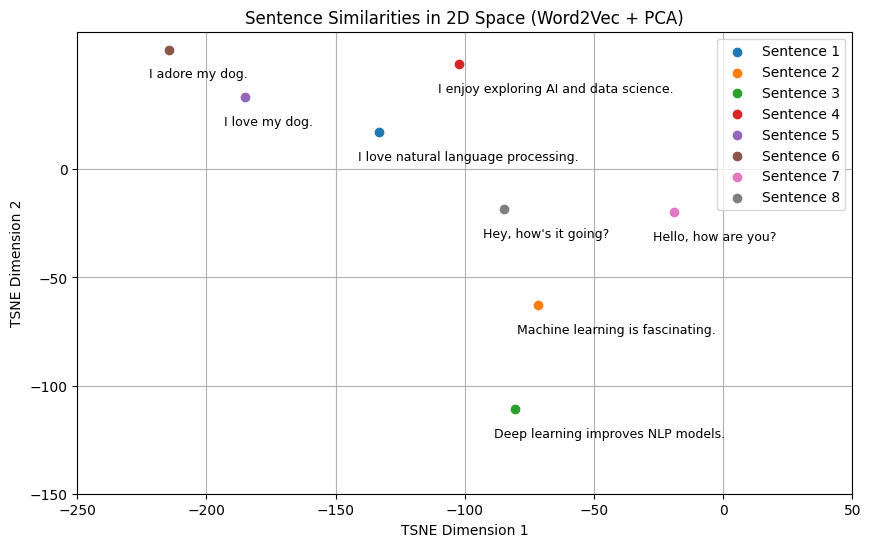

In [3]:

from sklearn.manifold import TSNE
# 示例句子
sentences = [
    "I love natural language processing.",
    "Machine learning is fascinating.",
    "Deep learning improves NLP models.",
    "I enjoy exploring AI and data science.",
    "I love my dog.",
    "I adore my dog.",
    "Hello, how are you?",
    "Hey, how's it going?"
]

# 將句子轉換為向量
def sentence_to_vector(sentence, model):
    words = sentence.lower().split()
    word_vecs = [model[word] for word in words if word in model]
    if len(word_vecs) > 0:
        # 計算句子中所有單字向量的平均值
        return np.mean(word_vecs, axis=0)
    else:
        # 如果句子中沒有單字存在於模型中，返回零向量
        return np.zeros(model.vector_size)

# 對所有句子生成嵌入
sentence_vectors = np.array([sentence_to_vector(sentence, model) for sentence in sentences])

# 降維至 2D
# 使用 t-SNE 降維至 2D
# 使用 t-SNE 降維至 2D
tsne = TSNE(n_components=2, perplexity=3, random_state=42, init='pca')  # 确保 perplexity 小于句子数量
reduced_vectors = tsne.fit_transform(sentence_vectors)
#pca = PCA(n_components=2)
#reduced_vectors = pca.fit_transform(sentence_vectors)

# 視覺化句子之間的關係
plt.figure(figsize=(10, 6))
for i, sentence in enumerate(sentences):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=f"Sentence {i+1}")
    plt.text(reduced_vectors[i, 0] - 8, reduced_vectors[i, 1] - 13, sentence, fontsize=9)

plt.title("Sentence Similarities in 2D Space (Word2Vec + PCA)")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
#xticks從-300到0
plt.xticks(np.arange(-250, 100, 50))
plt.yticks(np.arange(-150, 50, 50))
plt.legend()
plt.grid()
plt.show()